# Basic Statistical Functions — Python Edition

This is intended to serve as a cheat-sheet for commonly used operations in python

In [2]:
# We first start with importing packages that are most commonly used for data processing

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Functions that use random sampling will require a sandom seed specification
# to assure Reproducibility

rng = np.random.default_rng(444)


## Summary statistics
Assume a DataFrame `df` with a numeric column `var1`.

In [3]:
# Example data
df = pd.DataFrame({
    "var1": rng.normal(loc=10, scale=3, size=1000),
    "var2": rng.integers(0, 5, size=1000)
})
df.head()

,var1,var2
0,7.929657,2
1,3.686336,2
2,7.636329,0
3,12.802522,3
4,11.746126,4


In [4]:
# Basic summaries (equivalents of mean/median/min/max/range/sd/var/IQR/quantile)

mean_val = df["var1"].mean()
median_val = df["var1"].median()
min_val = df["var1"].min()
max_val = df["var1"].max()
_range = (min_val, max_val)
sd_val = df["var1"].std(ddof=1)   # sample sd
var_val = df["var1"].var(ddof=1)  # sample variance
iqr_val = df["var1"].quantile(0.75) - df["var1"].quantile(0.25)
q_vals = df["var1"].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

summary = pd.Series({
    "mean": mean_val,
    "median": median_val,
    "min": min_val,
    "max": max_val,
    "sd (sample)": sd_val,
    "var (sample)": var_val,
    "IQR": iqr_val
})
summary, q_vals

(mean             9.969755
 median           9.769454
 min              0.366019
 max             19.807882
 sd (sample)      2.867482
 var (sample)     8.222456
 IQR              3.975441
 dtype: float64,
 0.10     6.490539
 0.25     7.927334
 0.50     9.769454
 0.75    11.902775
 0.90    13.719916
 Name: var1, dtype: float64)

## Visualizations

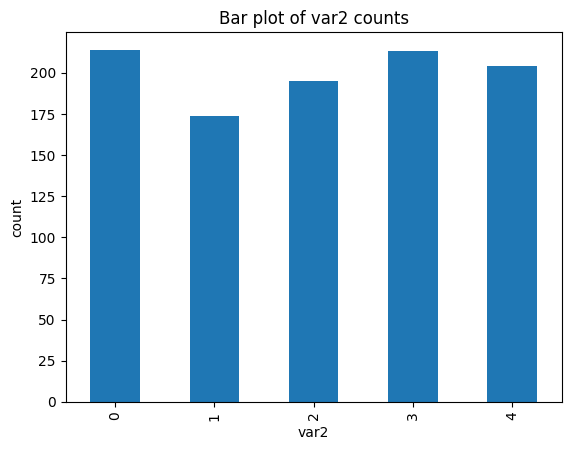

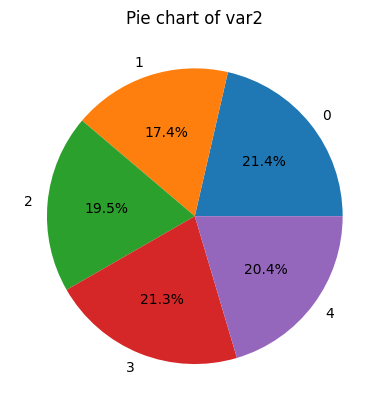

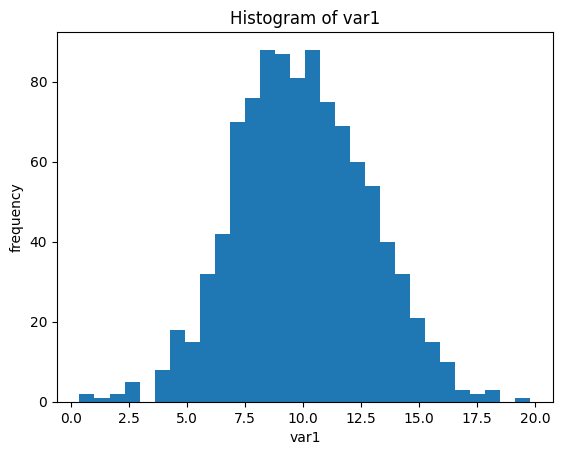

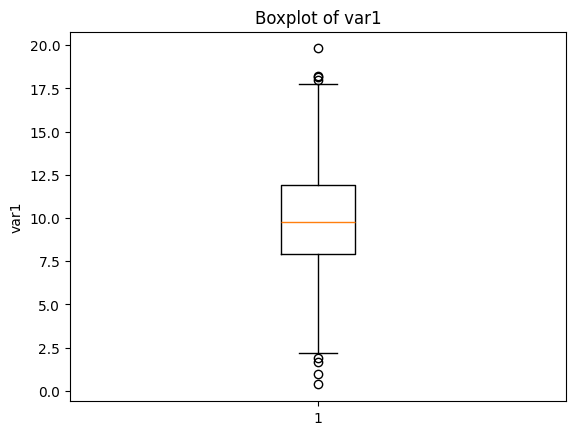

In [5]:
# Bar plot (for counts), Pie chart, Histogram, Boxplot
counts = df["var2"].value_counts().sort_index()

# Bar plot
plt.figure()
counts.plot(kind="bar")
plt.title("Bar plot of var2 counts")
plt.xlabel("var2")
plt.ylabel("count")
plt.show()

# Pie chart
plt.figure()
counts.plot(kind="pie", autopct='%1.1f%%')
plt.title("Pie chart of var2")
plt.ylabel("")
plt.show()

# Histogram
plt.figure()
plt.hist(df["var1"], bins=30)
plt.title("Histogram of var1")
plt.xlabel("var1")
plt.ylabel("frequency")
plt.show()

# Boxplot
plt.figure()
plt.boxplot(df["var1"], vert=True)
plt.title("Boxplot of var1")
plt.ylabel("var1")
plt.show()


## Distribution Functions

SciPy Library contains functions to sample from distributions, see `stats.<family>` methods:

- `pdf` / `pmf`: density/mass at `x`
- `cdf`: cumulative probability `P(X \le x)`
- `ppf`: quantile function (inverse cdf)
- `rvs`: random sampling

### Binomial

In [6]:
n, p = 10, 0.3
x = np.arange(0, n+1)

pmf_vals = stats.binom.pmf(x, n, p)
cdf_vals = stats.binom.cdf(x, n, p)
q_80 = stats.binom.ppf(0.8, n, p)  # 80th percentile
samples = stats.binom.rvs(n, p, size=1000, random_state=rng)

pmf_vals[:5], cdf_vals[:5], q_80, samples[:10]

(array([0.02824752, 0.12106082, 0.23347444, 0.26682793, 0.20012095]),
 array([0.02824752, 0.14930835, 0.38278279, 0.64961072, 0.84973167]),
 np.float64(4.0),
 array([3, 0, 1, 3, 4, 2, 1, 4, 3, 5]))

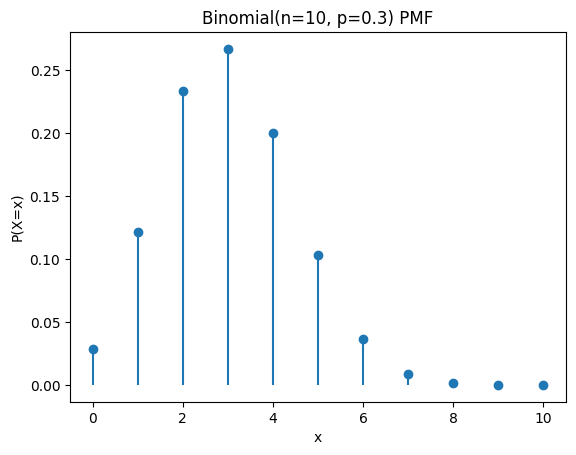

In [8]:
# Visualize binomial pmf
plt.figure()
plt.stem(x, pmf_vals, basefmt=" ")
plt.title("Binomial(n=10, p=0.3) PMF")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.show()


### Hypergeometric

In [9]:
# Parameters match R's dhyper(x, m, n, k):
# m = #successes in population, n = #failures in population, k = draws
M_success, N_fail, K_draws = 7, 13, 5
# SciPy parameterization: M = total population size, n = #successes, N = draws
M_total = M_success + N_fail
x = np.arange(max(0, K_draws - N_fail), min(K_draws, M_success) + 1)
pmf_vals = stats.hypergeom.pmf(x, M_total, M_success, K_draws)
cdf_vals = stats.hypergeom.cdf(x, M_total, M_success, K_draws)
q_5 = stats.hypergeom.ppf(0.5, M_total, M_success, K_draws)
samples = stats.hypergeom.rvs(M_total, M_success, K_draws, size=1000, random_state=rng)

x, pmf_vals[:5], cdf_vals[:5], q_5, samples[:10]

(array([0, 1, 2, 3, 4, 5]),
 array([0.08301084, 0.32281992, 0.3873839 , 0.17608359, 0.02934727]),
 array([0.08301084, 0.40583075, 0.79321465, 0.96929825, 0.99864551]),
 np.float64(2.0),
 array([1, 0, 2, 2, 2, 2, 1, 2, 3, 2]))

### Geometric

In [10]:
# SciPy's geom is the distribution of the number of trials needed to get 1st success (support 1,2,3,...)
p = 0.25
x = np.arange(1, 15)
pmf_vals = stats.geom.pmf(x, p)
cdf_vals = stats.geom.cdf(x, p)
q_9 = stats.geom.ppf(0.9, p)
samples = stats.geom.rvs(p, size=1000, random_state=rng)

pmf_vals[:5], cdf_vals[:5], q_9, samples[:10]

(array([0.25      , 0.1875    , 0.140625  , 0.10546875, 0.07910156]),
 array([0.25      , 0.4375    , 0.578125  , 0.68359375, 0.76269531]),
 np.float64(9.0),
 array([1, 3, 8, 1, 1, 9, 5, 5, 3, 5]))

### Poisson

In [11]:
lam = 3.5
x = np.arange(0, 15)
pmf_vals = stats.poisson.pmf(x, lam)
cdf_vals = stats.poisson.cdf(x, lam)
q_95 = stats.poisson.ppf(0.95, lam)
samples = stats.poisson.rvs(lam, size=1000, random_state=rng)

pmf_vals[:5], cdf_vals[:5], q_95, samples[:10]

(array([0.03019738, 0.10569084, 0.18495897, 0.21578547, 0.18881229]),
 array([0.03019738, 0.13588823, 0.3208472 , 0.53663267, 0.72544495]),
 np.float64(7.0),
 array([3, 4, 7, 8, 3, 4, 4, 6, 2, 4]))

### Normal

In [12]:
mu, sigma = 0.0, 1.0
x = np.linspace(-4, 4, 200)
pdf_vals = stats.norm.pdf(x, mu, sigma)
cdf_vals = stats.norm.cdf(x, mu, sigma)
q_975 = stats.norm.ppf(0.975, mu, sigma)  # ~1.96
samples = stats.norm.rvs(mu, sigma, size=1000, random_state=rng)

pdf_vals[:5], cdf_vals[:5], q_975, samples[:10]

(array([0.00013383, 0.00015705, 0.000184  , 0.00021523, 0.00025135]),
 array([3.16712418e-05, 3.75064371e-05, 4.43483968e-05, 5.23578682e-05,
        6.17189366e-05]),
 np.float64(1.959963984540054),
 array([-1.19515713,  0.06408615, -0.20083251,  0.30413091,  0.74471359,
        -1.37338726,  0.61529235, -0.17464619, -2.42686195, -0.24604878]))

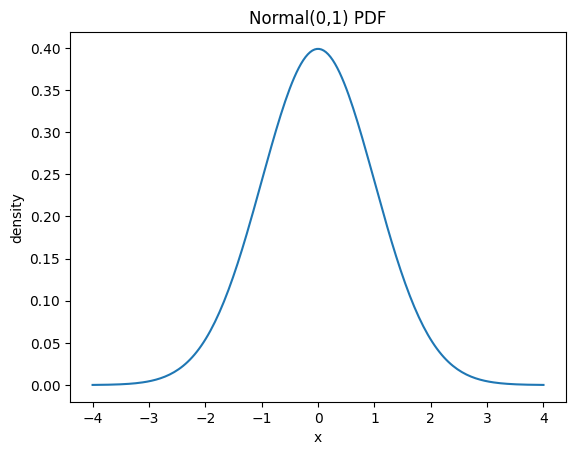

In [13]:
# Visualize normal pdf
plt.figure()
plt.plot(x, pdf_vals)
plt.title("Normal(0,1) PDF")
plt.xlabel("x")
plt.ylabel("density")
plt.show()


### Uniform

In [14]:
a, b = -2.0, 3.0  # min, max
x = np.linspace(a, b, 100)
pdf_vals = stats.uniform.pdf(x, loc=a, scale=b-a)
cdf_vals = stats.uniform.cdf(x, loc=a, scale=b-a)
q_25 = stats.uniform.ppf(0.25, loc=a, scale=b-a)
samples = stats.uniform.rvs(loc=a, scale=b-a, size=1000, random_state=rng)

pdf_vals[:5], cdf_vals[:5], q_25, samples[:10]

(array([0.2, 0.2, 0.2, 0.2, 0.2]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404]),
 np.float64(-0.75),
 array([-0.56788992, -1.47654457,  2.55103589,  1.64786168, -0.36940683,
        -1.42111396, -0.29974298,  0.39770715, -1.52600022, -0.38833411]))

### Exponential

In [15]:
rate = 2.0  # lambda
scale = 1.0 / rate
x = np.linspace(0, 4, 200)
pdf_vals = stats.expon.pdf(x, scale=scale)
cdf_vals = stats.expon.cdf(x, scale=scale)
q_9 = stats.expon.ppf(0.9, scale=scale)
samples = stats.expon.rvs(scale=scale, size=1000, random_state=rng)

pdf_vals[:5], cdf_vals[:5], q_9, samples[:10]

(array([2.        , 1.92119267, 1.84549064, 1.77277154, 1.70291785]),
 array([0.        , 0.03940366, 0.07725468, 0.11361423, 0.14854108]),
 np.float64(1.151292546497023),
 array([0.01553219, 2.31449242, 0.15976288, 0.52684387, 0.82122188,
        0.21969206, 1.24001475, 0.25657004, 0.64343428, 0.95667064]))

## Contingency tables
Use `pandas.crosstab` for counts, proportions, and margins.

In [16]:
# Synthetic categorical data
df2 = pd.DataFrame({
    "var1": rng.choice(["A","B","C"], size=500, p=[0.5, 0.3, 0.2]),
    "var2": rng.choice(["X","Y"], size=500, p=[0.6, 0.4])
})

# Counting table
tbl = pd.crosstab(df2["var1"], df2["var2"])
tbl


var2,X,Y
var1,,
A,149,107
B,93,63
C,57,31


In [17]:
# Proportion table (overall proportion)
prop_overall = tbl / tbl.values.sum()
prop_overall


var2,X,Y
var1,,
A,0.298,0.214
B,0.186,0.126
C,0.114,0.062


In [18]:
# Margins (sums) added
tbl_with_margins = tbl.copy()
tbl_with_margins.loc["All", :] = tbl_with_margins.sum(axis=0)
tbl_with_margins.loc[:, "All"] = tbl_with_margins.sum(axis=1)
tbl_with_margins


var2,X,Y,All
var1,,,
A,149.0,107.0,256.0
B,93.0,63.0,156.0
C,57.0,31.0,88.0
All,299.0,201.0,500.0
